In [112]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
matplotlib.rcParams['figure.figsize'] = (16, 10)
from sklearn import linear_model
import os
_linear_model = linear_model.RANSACRegressor(linear_model.LinearRegression())



In [116]:
def find_csv_filenames( path_to_dir, suffix=".csv" ):
    filenames = os.listdir(path_to_dir)
    return [ filename for filename in filenames if filename.endswith( suffix ) ]

-0.999751333668


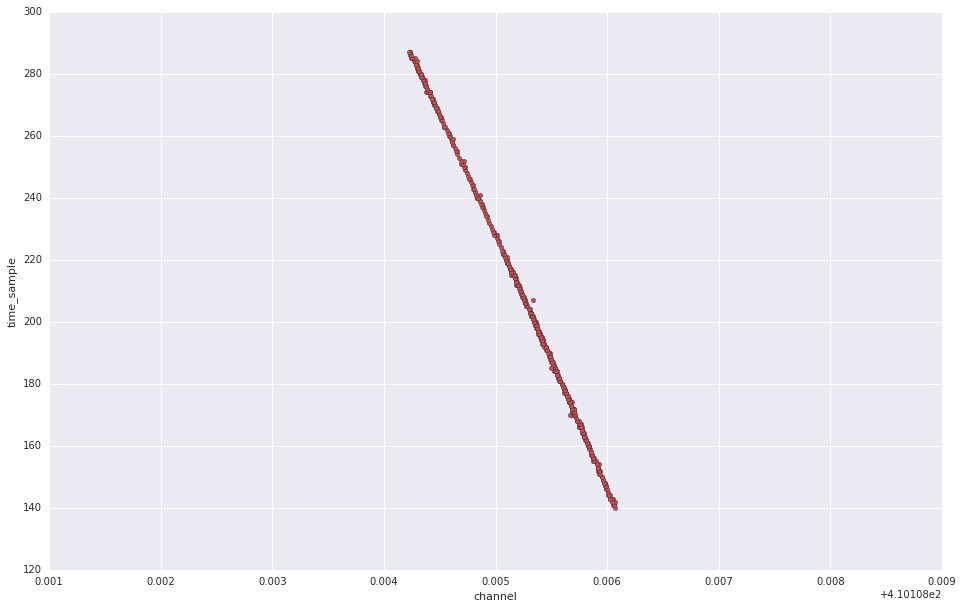

In [137]:
root = '/home/denis/Development/birales/pybirales/'
csvs = find_csv_filenames(root)
cs = ['r', 'b', 'g', 'c']

dfs = [pd.read_csv(os.path.join(root, c)) for c in csvs]

ax = dfs[0].plot(x='channel', y='time_sample', kind='scatter', color=cs[0])
print(dfs[0]['time_sample'].corr(dfs[0]['channel']))

j = 1
for i, d in enumerate(dfs[1:]):
    d.plot(x='channel', y='time_sample', kind='scatter', color=cs[j], ax=ax)
    l = _linear_model.fit(dfs[j]['channel'].values.reshape(-1, 1), dfs[j]['time_sample'])
    print(l.estimator_.coef_[0])
    j=j+1


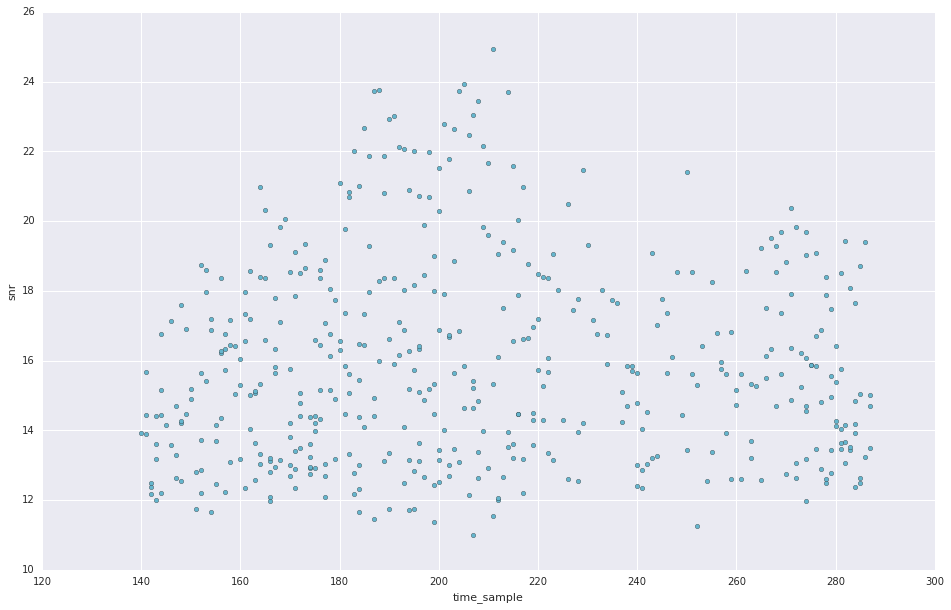

In [143]:
df = dfs[0]
channels = df['channel'].values.reshape(-1, 1)
time = df['time_sample']
l = _linear_model.fit(channels, time)
l.estimator_.coef_
l.estimator_.score(channels[l.inlier_mask_], time[l.inlier_mask_])

df[l.inlier_mask_].plot(x='time_sample', y='snr', kind='scatter', color=cs[3])
